In [2]:
import sys
sys.path
for path in sys.path:
    if('Roam'in path):
        sys.path.remove(path)
sys.path

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\86136\Desktop\大学\大二下\数据分析\实验\exp4\exp3.csv')
df.set_index('index',drop=True)

,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,team1_firstRiftHerald,...,player9_goldEarned,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane
index,,,,,,,,,,,,,,,,,,,,,
0,420,11,13,0,True,False,False,False,False,False,...,6967,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE
1,420,11,13,1,False,True,True,False,True,True,...,8133,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM
2,420,11,13,0,False,True,False,False,True,True,...,11868,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP
3,420,11,13,0,True,False,False,False,True,False,...,6703,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP
4,420,11,13,1,True,True,True,False,False,True,...,6823,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,420,11,13,0,False,False,False,False,False,False,...,10136,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM
79996,420,11,13,1,True,True,True,True,False,True,...,9411,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE
79997,420,11,13,0,True,False,False,False,False,False,...,11107,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE


In [6]:
df['goldminus']=0
name='goldEarned'
for i in range(1,6):
    full_name='player'+str(i)+'_'+name
    df['goldminus']+=df[full_name]
for i in range(6,11):
    full_name='player'+str(i)+'_'+name
    df['goldminus']-=df[full_name]
df

,index,queueId,mapId,seasonId,team1_win,team1_firstBlood,team1_firstTower,team1_firstInhibitor,team1_firstBaron,team1_firstDragon,...,player9_role,player9_lane,player10_championId,player10_kills,player10_deaths,player10_assists,player10_goldEarned,player10_role,player10_lane,goldminus
0,0,420,11,13,0,True,False,False,False,False,...,DUO_SUPPORT,NONE,157,3,0,8,8168,DUO,NONE,-9479
1,1,420,11,13,1,False,True,True,False,True,...,SOLO,MIDDLE,555,3,7,4,6943,DUO_SUPPORT,BOTTOM,10872
2,2,420,11,13,0,False,True,False,False,True,...,DUO_CARRY,BOTTOM,122,2,2,1,9685,SOLO,TOP,-4334
3,3,420,11,13,0,True,False,False,False,True,...,DUO_SUPPORT,BOTTOM,23,6,2,10,13109,SOLO,TOP,-4682
4,4,420,11,13,1,True,True,True,False,False,...,DUO,MIDDLE,25,5,7,8,6809,DUO_SUPPORT,BOTTOM,9262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79995,420,11,13,0,False,False,False,False,False,...,DUO_CARRY,BOTTOM,235,3,5,13,8540,DUO_SUPPORT,BOTTOM,-12591
79996,79996,420,11,13,1,True,True,True,True,False,...,DUO_SUPPORT,TOP,157,0,7,4,8248,SOLO,MIDDLE,10282
79997,79997,420,11,13,0,True,False,False,False,False,...,NONE,JUNGLE,7,10,2,13,11401,DUO,MIDDLE,-15349
79998,79998,420,11,13,0,False,False,False,False,True,...,DUO_CARRY,BOTTOM,412,1,3,6,5607,DUO_SUPPORT,BOTTOM,-8395


### 一维的KNN算法

In [7]:
#由于series和dataframe的不同性质，一维和多维的knn算法分开写
#inX是单值，dataset是list,labels是list
def KNN1(inX,dataset,labels,k):
    classify={1:0,0:0}
    datasetsize=len(dataset)
    dist_arr=[]
    for i in range(datasetsize):
        distance=abs(inX-dataset[i])
        dist_arr.append(distance)
    dist_arr=np.array(list(dist_arr))
    sorted_dist=dist_arr.argsort()
    for i in range(k):
        label=labels[sorted_dist[i]]
        classify[label]=classify[label]+1
    if(classify[1]>classify[0]):
        return True
    else:
        return False

- 模型验证
    - 特征是经济差

In [8]:
#采用4:1比例
#前64000条数据是训练集，后16000条数据是验证集
labels=list(df['team1_win'][:64000])
dataset=list(df['goldminus'][:64000])

yuce_dict={1:0,0:0}
size=200
num_lst=np.random.randint(low=60001,high=79999,size=size)
for i in num_lst:
    inX=df['goldminus'][i]
    yuce=KNN1(inX, dataset, labels, 10)
    if(yuce==df['team1_win'][i]):
        yuce_dict[1]+=1
    else:
        yuce_dict[0]+=1
    # if((yuce_dict[1]+yuce_dict[0])%50==0):
    #     print('已计算'+str(int((yuce_dict[1]+yuce_dict[0])/size*100))+'%',sep='……')
#输出正确预测的概率
print('预测准确率为：'+str(int(yuce_dict[1]/(yuce_dict[1]+yuce_dict[0])*100))+'%')

预测准确率为：98%


### n维KNN算法

In [44]:
#inX是n元series,dataset是n列的dataframe,labels是n元series
def KNN2(inX,dataset,labels,k):
    classify={1:0,0:0}
    datasetsize=dataset.shape[0]
    try:
        dim=dataset.shape[1]
        if(len(inX)!= dim or len(labels)!=datasetsize):
            print('维数不匹配！')
            return
    except(IndexError):
        dim = 1
    dist_arr=[]
    for i in range(datasetsize):
        # dist_vect=np.array(inX)-np.array(dataset.loc[i])
        distance=0
        for j in range(dim):
            x1=float(inX[j])
            x2=float(dataset.iloc[i,j])
            distance+=(x1-x2)**2
        distance=distance**0.5
        dist_arr.append(distance)
    dist_arr=np.array(list(dist_arr))
    sorted_dist=dist_arr.argsort()
    # print(sorted_dist)
    for i in range(k):
        label=int(labels.loc[sorted_dist[i]])
        classify[label]=classify[label]+1
#     print(classify)
    if(classify[1]>classify[0]):
        return True
    else:
        return False

In [12]:
#二维测试，测试特征是经济差和first_inhibitor
dataset=df.loc[:6000,['team1_firstInhibitor','goldminus']]
labels=df.loc[:6000,['team1_win']]

In [14]:
#归一化特征
dim=dataset.shape[1]
length=dataset.shape[0]
for j in range(dim):
    minvalue = float(dataset.iloc[:,j].min())
    maxvalue = float(dataset.iloc[:,j].max())
    ranges=maxvalue-minvalue
    for i in range(length):
        dataset.iloc[i,j]=(dataset.iloc[i,j]-minvalue)/ranges
dataset

,team1_firstInhibitor,goldminus
0,0,0.349638
1,1,0.762011
2,0,0.453892
3,0,0.446840
4,1,0.729387
...,...,...
5996,1,0.661668
5997,0,0.275658
5998,0,0.424976
5999,0,0.391157


In [45]:
#4:1验证
size2=50
num_lst=np.random.randint(low=60001,high=79999,size=size2)
yuce_dict={1:0,0:0}
for num in num_lst:
    inX=df.loc[num,['team1_firstInhibitor','goldminus']]
    yuce=KNN2(inX, dataset, labels, 10)
    if(yuce==df['team1_win'][num]):
        yuce_dict[1]+=1
    else:
        yuce_dict[0]+=1
    if((yuce_dict[1]+yuce_dict[0])%10==0):
        print('已计算'+str(int((yuce_dict[1]+yuce_dict[0])/size2*100))+'%',sep='……')
#输出正确预测的概率
print('预测准确率为：'+str(int(yuce_dict[1]/(yuce_dict[1]+yuce_dict[0])*100))+'%')

已计算20%
已计算40%
已计算60%
已计算80%
已计算100%
预测准确率为：96%


#### 画图看一下KNN算法的表现

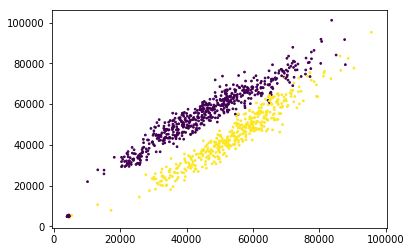

In [57]:
#要求离散的数据
#dataset采用team1_gold和team2_gold
df['team1_gold']=0
df['team2_gold']=0
df['team1_gold']=df['player1_goldEarned']+df['player2_goldEarned']+df['player3_goldEarned']+df['player4_goldEarned']+df['player5_goldEarned']
df['team2_gold']=df['player6_goldEarned']+df['player7_goldEarned']+df['player8_goldEarned']+df['player9_goldEarned']+df['player10_goldEarned']
#选取的数据个数
n2=1000
dataset2=df.loc[:n2,['team1_gold','team2_gold']]
labels2=df.loc[:n2,'team1_win']

In [49]:
#修改一下knn算法，获取选取的值
def KNN3(inX,dataset,labels,k):
    classify={1:0,0:0}
    datasetsize=dataset.shape[0]
    try:
        dim=dataset.shape[1]
        if(len(inX)!= dim or len(labels)!=datasetsize):
            print('维数不匹配！')
            return
    except(IndexError):
        dim = 1
    dist_arr=[]
    for i in range(datasetsize):
        distance=0
        for j in range(dim):
            x1=float(inX[j])
            x2=float(dataset.iloc[i,j])
            distance+=(x1-x2)**2
        distance=distance**0.5
        dist_arr.append(distance)
    dist_arr=np.array(list(dist_arr))
    sorted_dist=dist_arr.argsort()
    for i in range(k):
        label=int(labels.loc[sorted_dist[i]])
        classify[label]=classify[label]+1
    if(classify[1]>classify[0]):
        return True,sorted_dist[:k]
    else:
        return False,sorted_dist[:k]

#### 画图表示KNN算法
- 红色点是测试点
- 绿色点是数据集上的k近邻点
- 紫色、黄色点是数据集上的点

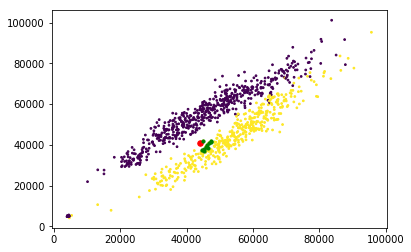

In [75]:
rand_num=np.random.randint(n2+1,60000)
inX2=df.loc[rand_num,['team1_gold','team2_gold']]
result,num_list=KNN3(inX2,dataset2,labels2,10)
#画图
fig,ax = plt.subplots()
ax.scatter(dataset2.iloc[:,0],dataset2.iloc[:,1],c=labels2,s=3)
ax.scatter(inX2[0],inX2[1],c='red',s=30)
ax.scatter(dataset2.iloc[num_list,0],dataset2.iloc[num_list,1],c='green',s=10)
plt.show()

In [77]:
#由于经济差这个单一特征在胜率的预测上准确度非常之高
#下面采用这一单一特征进行验证KNN的预测准确率
#k折交叉验证法
#inX是单值，dataset是list,labels是list
#不知道为什么，KNN算法对于80000条数据跑的速度过于慢了，所以我从中挑了8000条数据跑一下
import random
#这个包是为了随机获取数据，没用别的函数搞事情
n=8000#取得训练数据和测试数据总数
a = list(range(80000))
random.shuffle(a)
b = a[:n]
test_df = df.iloc[b, :]
#进行10折检验
k = 10
dic = {1: 0, 0: 0}

for j in range(k):
    random.shuffle(b)
    train_df = df.iloc[b[:int((k-1)/k*n)],:]
    test_dataset = list(train_df['goldminus'])
    test_labels = list(train_df['team1_win'])

    # print(type(type(test_dataset)))
    for i in range(int(1/k*n)):
        test_inX = df['goldminus'][b[-i]]
        real_result = df['team1_win'][b[-i]]
        result = KNN1(test_inX, test_dataset, test_labels, 10)
        if (result == real_result):
            dic[1] += 1
        else:
            dic[0] += 1

print('预测准确率为'+str(float(100*dic[1] / (dic[1] + dic[0]))))

预测准确率为97.8125


In [87]:
#假设检验
#这个不得不调用一下scipy包
#H0:预测正确率不小于0.97   H1:预测正确率小于0.97

#获取正确率的数据
n=2000#取得训练数据和测试数据总数
a = list(range(80000))
random.shuffle(a)
b = a[:n]
test_df = df.iloc[b, :]
#进行10折检验
k = 10
dic = {1: 0, 0: 0}
per_list=[]
for j in range(k):
    random.shuffle(b)
    train_df = df.iloc[b[:int((k-1)/k*n)],:]
    test_dataset = list(train_df['goldminus'])
    test_labels = list(train_df['team1_win'])
    dic2={0:0,1:0}
    # print(type(type(test_dataset)))
    for i in range(int(1/k*n)):
        test_inX = df['goldminus'][b[-i]]
        real_result = df['team1_win'][b[-i]]
        result = KNN1(test_inX, test_dataset, test_labels, 10)
        if (result == real_result):
            dic2[1] += 1
        else:
            dic2[0] += 1
        
    per_list.append(dic2[1] / (dic2[1] + dic2[0]))


- 可以有97%的把握认为预测准确，但没有98%的把握

In [92]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(per_list, 0.97)
pval


0.9026813728242564